In [ ]:
# To upload the json file, choose the file below
from google.colab import files
files.upload()

# To load the kaggle Dataset
# Please Upload the kaggle.json file to the current directory
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# Downloading and unzipping dataset
! mkdir traffic_dataset
! kaggle datasets download -d silicon99/dft-accident-data
! unzip dft-accident-data.zip -d traffic_dataset/

In [25]:
# Cell for all the import statements

import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
import seaborn

# Suppressing warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [18]:

# Reading the input file
accidents_file = pd.read_csv('traffic_dataset/Accidents0515.csv')
casualties_file = pd.read_csv('traffic_dataset/Casualties0515.csv', error_bad_lines = False)

# Printing head of the file
accidents_file.head()
casualties_file.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


Text(0.5, 0, 'Road Condition')

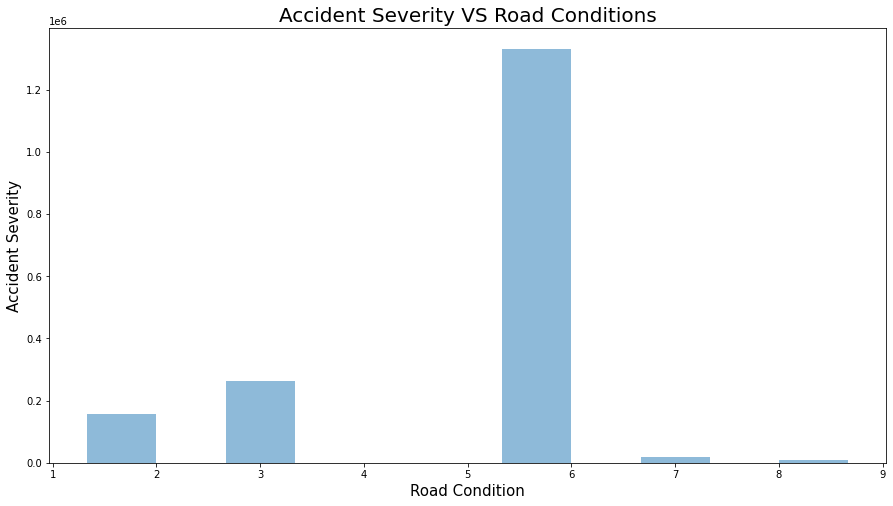

In [8]:
# Plotting road conditions VS accident severity
plt.figure(figsize = (15, 8))
plt.title('Accident Severity VS Road Conditions', fontsize = 20)

# Creating a histogram for the plot
accidents_file.Road_Type.hist(bins = 6, alpha = 0.5, rwidth = 0.5)
plt.grid(False)

# Setting titles
plt.ylabel('Accident Severity', fontsize = 15)
plt.xlabel('Road Condition', fontsize = 15)

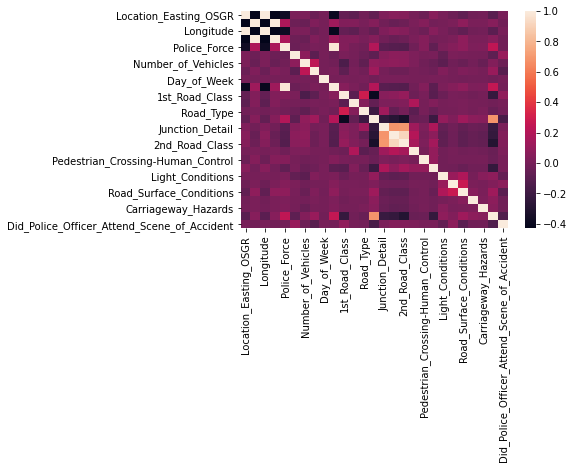

In [12]:
# Plotting a heatmap using seaborn
correlation = accidents_file.corr()
plt.plot(figsize = (50, 50))
seaborn.heatmap(correlation)

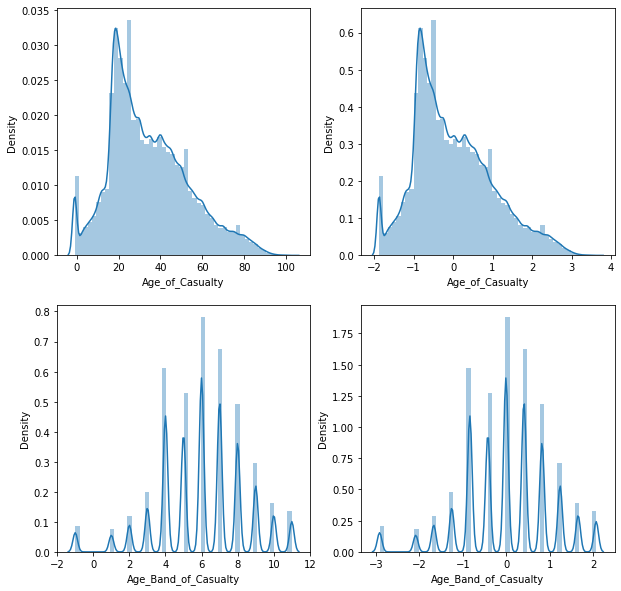

In [26]:

age = casualties_file.Age_of_Casualty
age_band = casualties_file.Age_Band_of_Casualty
fig = plt.figure(figsize=(10, 10))

# Plotting after normalization
plt.subplot(2, 2, 1)
seaborn.distplot(casualties_file.Age_of_Casualty)

# Mean Normalizing age
plt.subplot(2, 2, 2)
normalized_age = (age - age.mean()) / age.std()
seaborn.distplot(normalized_age)

plt.subplot(2, 2, 3)
seaborn.distplot(age_band)

# Mean Normalizing age band
plt.subplot(2, 2, 4)
normalized_age_band = (age_band - age_band.mean()) / age_band.std()
seaborn.distplot(normalized_age_band)

